In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('topdev.csv')
data.head(3)

,ten_cong_viec,ten_cong_ty,muc_luong,dia_chi,ngay_dang,nganh_nghe,quy_mo_cong_ty,quoc_tich_cong_ty,nam_kinh_nghiem,cap_bac,loai_hinh,loai_hop_dong,cong_nghe_su_dung,quy_trinh_phong_van,mo_ta_cong_viec,thong_tin_cong_ty,url,thoi_gian_hien_tai
0,['Drupal Developer'],['InterGreat Education Group'],['Thương lượng'],"['Tầng 20, Tòa ICON4, 243A Đê La Thành, Phường...",['Đăng 4 giờ trước'],['Giáo dục'],['25-99 Nhân viên'],"['China, India, United-Kingdom, Vietnam']",['Từ 2 năm'],"['Middle, Senior']",['In Office'],['Fulltime'],"['PHP', 'Drupal', 'GitFlow']",['Vòng 1: CV screenning => Phone Interview => ...,['We are searching for Drupal Developers to jo...,['InterGreat Education Group was founded in 20...,https://topdev.vn/viec-lam/drupal-developer-in...,2024-10-28 22:45:50.922269
1,['Trưởng Nhóm Kỹ Thuật (Technical Leader)'],['The Black Ants'],['Thương lượng'],"['Tầng 7, Toà nhà Bưu Điện Đà Năng, 271 Nguyễn...",['Đăng 4 giờ trước'],['Gia công phần mềm'],['10-24 Nhân viên'],['Vietnam'],['Từ 2 năm'],['Trưởng Nhóm'],['In Office'],['Fulltime'],"['Python', 'NodeJS', 'ReactJS']","['Vòng 1: Phỏng vấn với HR', 'Vòng 2: Phỏng vấ...","['Trách nhiệm công việc\n Thiết kế, phát triển...",[],https://topdev.vn/viec-lam/truong-nhom-ky-thua...,2024-10-28 22:45:50.922269
2,['IT Helpdesk'],['SanAn'],['Lên tới 10.000.000 VND'],"['Tầng 1, CIC Tower, số 1 Nguyễn Thị Duệ, Phườ...",['Đăng 5 giờ trước'],['Software'],['25-99 Nhân viên'],['Vietnam'],['Từ 1 năm'],"['Junior, Middle, Senior']",['In Office'],['Fulltime'],"['Linux', 'IT Helpdesk', 'Windows']",[],['Trách nhiệm công việc\n Triển khai công cụ h...,[],https://topdev.vn/viec-lam/it-helpdesk-sanan-2...,2024-10-28 22:45:50.922269


In [3]:
data = data.drop(columns=['thong_tin_cong_ty'])

In [4]:
data.shape

(799, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ten_cong_viec        799 non-null    object
 1   ten_cong_ty          799 non-null    object
 2   muc_luong            799 non-null    object
 3   dia_chi              799 non-null    object
 4   ngay_dang            799 non-null    object
 5   nganh_nghe           799 non-null    object
 6   quy_mo_cong_ty       799 non-null    object
 7   quoc_tich_cong_ty    799 non-null    object
 8   nam_kinh_nghiem      799 non-null    object
 9   cap_bac              799 non-null    object
 10  loai_hinh            799 non-null    object
 11  loai_hop_dong        799 non-null    object
 12  cong_nghe_su_dung    799 non-null    object
 13  quy_trinh_phong_van  799 non-null    object
 14  mo_ta_cong_viec      799 non-null    object
 15  url                  799 non-null    object
 16  thoi_gia

In [6]:
data.iloc[0].thoi_gian_hien_tai

'2024-10-28 22:45:50.922269'

In [7]:
columns_to_clean = [
    "ten_cong_viec", "ten_cong_ty", "muc_luong", "dia_chi", "ngay_dang", "nganh_nghe", 
    "quy_mo_cong_ty", "quoc_tich_cong_ty", "nam_kinh_nghiem", "cap_bac", "loai_hinh", 
    "loai_hop_dong", "cong_nghe_su_dung", "quy_trinh_phong_van","mo_ta_cong_viec"
]
# Apply cleaning function to remove '[' and ']'
data[columns_to_clean] = data[columns_to_clean].replace({r'[\[\]\'"]': ''}, regex=True)
sample_text = data.iloc[1]['mo_ta_cong_viec']
data['mo_ta_cong_viec'] = data['mo_ta_cong_viec'].astype(str)
for i in range(data.shape[0]):
    fixed_sample_text_2 = data.iloc[i]['mo_ta_cong_viec'].replace('\\n', '\n')
    processed_text = ' '.join(fixed_sample_text_2 .split())
    data.loc[i, 'mo_ta_cong_viec'] = processed_text
# Kiểm tra kết quả
#Convert 'ngay_dang' column to datetime format
data['thoi_gian_hien_tai'] = pd.to_datetime(data['thoi_gian_hien_tai'], errors='coerce',format='%Y-%m-%d %H:%M:%S.%f')

#data['cong_nghe_su_dung'] = data['cong_nghe_su_dung'].str.split(", ")
#data['quy_trinh_phong_van'] = data['quy_trinh_phong_van'].str.split(", ")

In [8]:
data.iloc[1].mo_ta_cong_viec

'Trách nhiệm công việc Thiết kế, phát triển và triển khai các dịch vụ của Công ty. Tham gia vào tất cả các bước phát triển sản phẩm phần mềm từ phân tích, thiết kế tới triển khai và vận hành; Tham gia thiết kế, triển khai các dịch vụ/giải pháp của dự án; Tối ưu chức năng và hiệu năng của hệ thống; Deploy hệ thống Webapp, Tool trong các môi trường Staging và Product. Đảm bảo tiến độ và chất lượng lập trình Quản lý đội nhóm. Kỹ năng & Chuyên môn Tốt nghiệp đại học hoặc tương đương chuyên ngành IT. Có kinh nghiệm, kỹ năng quản lý tối thiểu là 2 năm Có kinh nghiệm thiết kế phần mềm, có thể thực hiện phân tích yêu cầu hệ thống và thiết kế kiến trúc. Kỹ năng code tốt và có khả năng đào tạo, nâng cao năng lực của đội nhóm. Thành thạo một ngôn ngữ lập trình Back-end: Node.js (ưu tiên), Python… Kinh nghiệm lập trình front-end: ReactJS, AngularJS Có kinh nghiệm làm việc về một số loại Database: MongoDB, MySQL, postgresql… Sử dụng thành thạo các công cụ quản lý Source Code như: Git … Có kinh nghi

In [9]:
data.replace('', pd.NA, inplace=True)

In [10]:
missing_ratio = data.isnull().mean() * 100
print(missing_ratio)

ten_cong_viec           0.000000
ten_cong_ty             0.000000
muc_luong               0.000000
dia_chi                 0.000000
ngay_dang               0.000000
nganh_nghe              0.750939
quy_mo_cong_ty          0.000000
quoc_tich_cong_ty       1.126408
nam_kinh_nghiem         0.000000
cap_bac                 0.000000
loai_hinh               3.254068
loai_hop_dong           0.250313
cong_nghe_su_dung       0.000000
quy_trinh_phong_van    31.414268
mo_ta_cong_viec         0.000000
url                     0.000000
thoi_gian_hien_tai      0.000000
dtype: float64


In [11]:
data.select_dtypes(exclude=['datetime']).describe()

,ten_cong_viec,ten_cong_ty,muc_luong,dia_chi,ngay_dang,nganh_nghe,quy_mo_cong_ty,quoc_tich_cong_ty,nam_kinh_nghiem,cap_bac,loai_hinh,loai_hop_dong,cong_nghe_su_dung,quy_trinh_phong_van,mo_ta_cong_viec,url
count,799,799,799,799,799,793,799,790,799,799,773,797,799,548,799,799
unique,242,115,50,132,21,54,7,22,11,18,7,3,226,98,245,245
top,Java Developer,Talent Success,Thương lượng,"Hồ Chí Minh, Thành phố Hồ Chí Minh",Đăng 1 tuần trước,Phần Mềm,25-99 Nhân viên,Vietnam,Từ 2 năm,"Middle, Senior",In Office,Fulltime,"QA, Tester, Manual Test","Vòng 1: CV Application, Vòng 2: Technical Asse...",Công ty TNHH Megazone Việt Nam tuyển dụng Busi...,https://topdev.vn/viec-lam/business-analyst-ko...
freq,9,64,541,37,201,156,281,487,235,264,676,788,13,30,5,5


In [12]:
data.replace(pd.NA, 'Khong co thong tin', inplace=True)

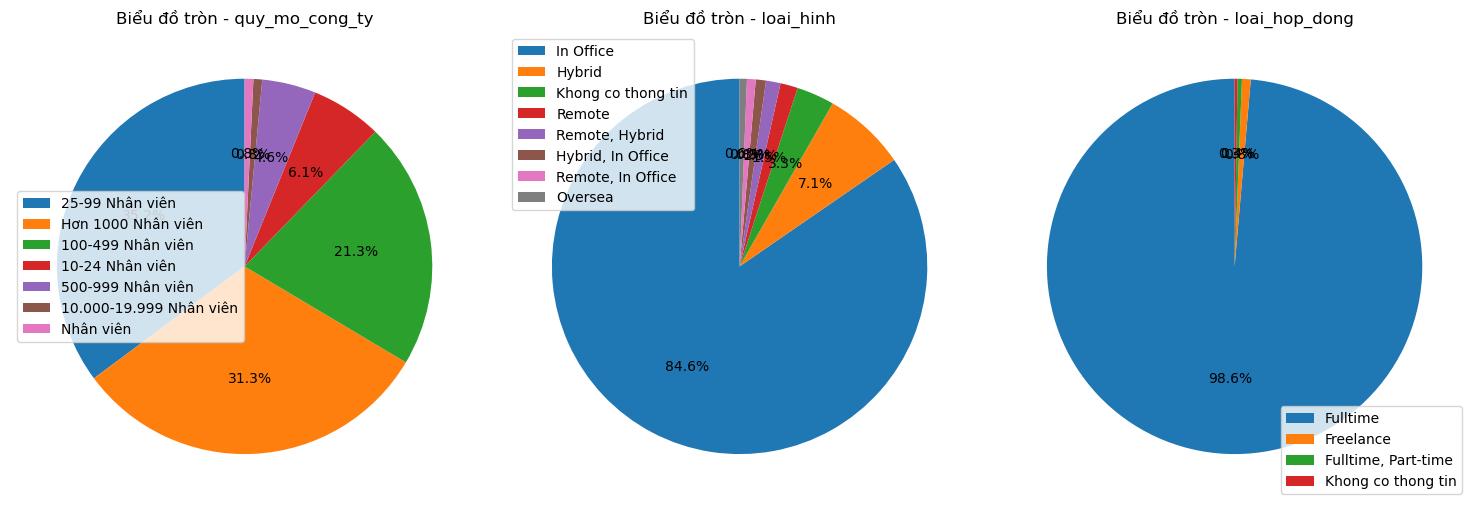

In [13]:
columns_to_plot = ['quy_mo_cong_ty', 'loai_hinh', 'loai_hop_dong']
plt.figure(figsize=(15, 5))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, 3, i)
    data[column].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=None)
    plt.title(f'Biểu đồ tròn - {column}')
    plt.legend(labels=data[column].value_counts().index, loc='best')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [14]:
data['quoc_tich_cong_ty'].value_counts()

Vietnam                                  487
South-Korea                               67
Japan                                     56
United States                             49
South-Korea, Vietnam                      30
United States, Vietnam                    19
Singapore                                 14
Khong co thong tin                         9
Japan, Singapore, Vietnam                  9
Taiwan                                     7
Netherlands, Vietnam                       6
Switzerland                                6
Philippines                                6
Sweden                                     5
China, India, United-Kingdom, Vietnam      4
Malaysia                                   4
Norway                                     3
Thailand                                   3
Vietnam, Korea                             3
European-Union                             3
New Zealand                                3
Korea                                      3
United-Kin

In [15]:
data.head(3)

,ten_cong_viec,ten_cong_ty,muc_luong,dia_chi,ngay_dang,nganh_nghe,quy_mo_cong_ty,quoc_tich_cong_ty,nam_kinh_nghiem,cap_bac,loai_hinh,loai_hop_dong,cong_nghe_su_dung,quy_trinh_phong_van,mo_ta_cong_viec,url,thoi_gian_hien_tai
0,Drupal Developer,InterGreat Education Group,Thương lượng,"Tầng 20, Tòa ICON4, 243A Đê La Thành, Phường L...",Đăng 4 giờ trước,Giáo dục,25-99 Nhân viên,"China, India, United-Kingdom, Vietnam",Từ 2 năm,"Middle, Senior",In Office,Fulltime,"PHP, Drupal, GitFlow",Vòng 1: CV screenning => Phone Interview => Fa...,We are searching for Drupal Developers to join...,https://topdev.vn/viec-lam/drupal-developer-in...,2024-10-28 22:45:50.922269
1,Trưởng Nhóm Kỹ Thuật (Technical Leader),The Black Ants,Thương lượng,"Tầng 7, Toà nhà Bưu Điện Đà Năng, 271 Nguyễn V...",Đăng 4 giờ trước,Gia công phần mềm,10-24 Nhân viên,Vietnam,Từ 2 năm,Trưởng Nhóm,In Office,Fulltime,"Python, NodeJS, ReactJS","Vòng 1: Phỏng vấn với HR, Vòng 2: Phỏng vấn Te...","Trách nhiệm công việc Thiết kế, phát triển và ...",https://topdev.vn/viec-lam/truong-nhom-ky-thua...,2024-10-28 22:45:50.922269
2,IT Helpdesk,SanAn,Lên tới 10.000.000 VND,"Tầng 1, CIC Tower, số 1 Nguyễn Thị Duệ, Phường...",Đăng 5 giờ trước,Software,25-99 Nhân viên,Vietnam,Từ 1 năm,"Junior, Middle, Senior",In Office,Fulltime,"Linux, IT Helpdesk, Windows",Khong co thong tin,Trách nhiệm công việc Triển khai công cụ hỗ tr...,https://topdev.vn/viec-lam/it-helpdesk-sanan-2...,2024-10-28 22:45:50.922269


In [16]:
data.to_csv('processed_data.csv', index=False, encoding='utf-8-sig')